In [1]:
import os
import numpy as np
import pandas as pd
from scipy.signal import resample
from scipy.stats import mode

os.environ["CUDA_VISIBLE_DEVICES"] = "-1"


In [2]:
data_dir = "../../data/dataset/"
subjects = os.listdir(data_dir)
gestures = ["Hello", "Good Morning"]

len_segment = 512
n_channels = 6
learning_rate = 3e-4

In [3]:
dataset = pd.DataFrame()

for subject in subjects:
    for gesture in gestures:
        gesture_dir = os.path.join(data_dir, subject, gesture)
        recordings = os.listdir(gesture_dir)
        for recording in recordings:
            file_path = os.path.join(gesture_dir, recording)
            data = pd.read_csv(file_path)
            data.drop(columns=["time"], inplace=True)
            data = data.apply(resample, args=(len_segment, None, 0))

            # ... calculating distance of the index finger
            data["drf1"] = ((data["rf1x"] - data["rpx"]).pow(2) + \
                    (data["rf1z"] - data["rpz"]).pow(2)).pow(0.5)

            data["dlf1"] = ((data["lf1x"] - data["lpx"]).pow(2) + \
                    (data["lf1z"] - data["lpz"]).pow(2)).pow(0.5)

            data["label"] = gestures.index(gesture)

            dataset = pd.concat([dataset, data])

dataset.reset_index(inplace=True)
dataset

,index,rpx,rpy,rpz,lpx,lpy,lpz,rf0x,rf0y,rf0z,...,lf2z,lf3x,lf3y,lf3z,lf4x,lf4y,lf4z,drf1,dlf1,label
0,0,2.599404,27.304919,-0.617718,0.000000,0.000000,0.000000,-3.635950,26.597775,-3.682417,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.802339,0.000000,0
1,1,46.389547,283.246325,-7.536959,0.000000,0.000000,0.000000,-19.863954,278.547042,-38.257400,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.714616,0.000000,0
2,2,45.397910,282.452449,-7.423016,0.000000,0.000000,0.000000,-20.586599,277.680570,-38.132502,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.337551,0.000000,0
3,3,46.233723,283.341784,-7.469585,0.000000,0.000000,0.000000,-19.993553,278.658837,-38.268613,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.730229,0.000000,0
4,4,45.780975,282.457195,-7.385623,0.000000,0.000000,0.000000,-20.179964,277.748211,-38.144121,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,103.361659,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,507,101.296983,265.143131,64.667423,-163.585182,270.878851,70.782352,71.407762,268.764850,8.646206,...,-17.806219,-150.555033,208.960365,-8.484315,-161.925642,197.035078,22.356758,121.366782,92.446095,1
3068,508,99.331777,263.535431,66.407303,-162.066015,268.690805,70.842530,71.155438,267.815150,8.615654,...,-16.885764,-149.624421,207.828237,-8.537009,-160.865729,196.251989,21.889821,122.932310,92.796100,1
3069,509,97.949939,263.240765,68.697249,-162.545062,269.446449,72.263241,71.407762,268.764850,8.646206,...,-15.326674,-150.886289,207.737377,-7.479977,-162.193814,196.704444,22.991579,125.472990,92.691131,1
3070,510,96.541280,260.791675,71.397863,-160.456251,267.392830,72.146265,71.155438,267.815150,8.615654,...,-15.589368,-149.342641,207.550287,-8.220025,-160.993475,196.747838,21.520753,128.013091,92.607393,1


In [4]:
features = dataset[["rpx", "rpz", "lpx", "lpz", "drf1", "dlf1", "label"]]
features

,rpx,rpz,lpx,lpz,drf1,dlf1,label
0,2.599404,-0.617718,0.000000,0.000000,9.802339,0.000000,0
1,46.389547,-7.536959,0.000000,0.000000,103.714616,0.000000,0
2,45.397910,-7.423016,0.000000,0.000000,103.337551,0.000000,0
3,46.233723,-7.469585,0.000000,0.000000,103.730229,0.000000,0
4,45.780975,-7.385623,0.000000,0.000000,103.361659,0.000000,0
...,...,...,...,...,...,...,...
3067,101.296983,64.667423,-163.585182,70.782352,121.366782,92.446095,1
3068,99.331777,66.407303,-162.066015,70.842530,122.932310,92.796100,1
3069,97.949939,68.697249,-162.545062,72.263241,125.472990,92.691131,1
3070,96.541280,71.397863,-160.456251,72.146265,128.013091,92.607393,1


In [5]:
import tensorflow as tf

from tensorflow.keras import layers, models, losses, optimizers
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

2022-06-10 00:12:57.943273: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [6]:
scaler = MinMaxScaler()
X = features.drop(columns=["label"]).to_numpy()
X = scaler.fit_transform(X)
X = X.reshape((-1, len_segment, n_channels))
y = features["label"].to_numpy().reshape((-1, len_segment))
y, _ = mode(y, axis=1)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)


In [7]:
def conv_block_1d():
    inputs = layers.Input(shape=(512, 1))
    x = layers.BatchNormalization()(inputs)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.Conv1D(8, 3, activation="selu")(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.Conv1D(16, 3, activation="selu")(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Flatten()(x)
    output = layers.Dense(32)(x)

    return inputs, output

def get_model(n_channels: int):
    inputs = []
    features = []

    for _ in range(n_channels):
        input_1d, features_1d = conv_block_1d()
        inputs.append(input_1d)
        features.append(features_1d)

    x = layers.concatenate(features, axis=-1)
    x = layers.Dropout(0.2)(x)
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.2)(x)
    output = layers.Dense(len(gestures), activation="softmax")(x)

    return models.Model(inputs, output)

In [8]:
model = get_model(n_channels=n_channels)

loss = losses.SparseCategoricalCrossentropy(from_logits=False)
optimizer = optimizers.Adam(learning_rate=learning_rate)
model.compile(
    loss=loss,
    optimizer=optimizer,
    metrics=["accuracy"]
)

2022-06-10 00:12:59.034210: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-10 00:12:59.034237: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: Andromeda
2022-06-10 00:12:59.034241: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: Andromeda
2022-06-10 00:12:59.034363: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:200] libcuda reported version is: 510.73.5
2022-06-10 00:12:59.034380: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:204] kernel reported version is: 510.73.5
2022-06-10 00:12:59.034385: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:310] kernel version seems to match DSO: 510.73.5
2022-06-10 00:12:59.034727: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions i

In [9]:
history = model.fit(
    x=np.split(X_train, n_channels, axis=-1),
    y=y_train,
    validation_data=(
        np.split(X_test, n_channels, axis=-1),
        y_test
    ),
    batch_size=4,
    epochs=200,
    verbose=0
)

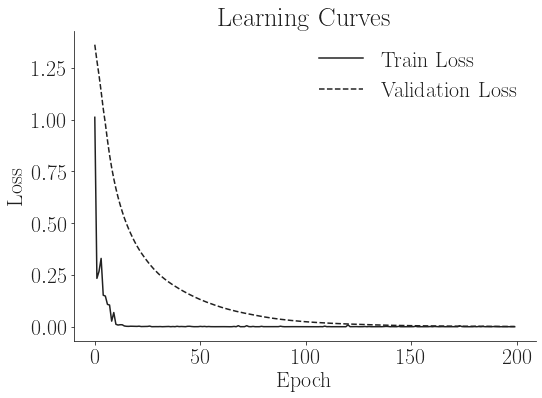

In [13]:
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size": 22,
    "text.color": "#212121",
    "axes.edgecolor": "#212121",
    "xtick.color": "#212121",
    "ytick.color": "#212121",
    "axes.labelcolor": "#212121",
    'legend.frameon': False,
})

fig = plt.figure(figsize=(8, 6))
ax = fig.gca()
ax.plot(history.history["loss"], "-", color="#212121", label="Train Loss")
ax.plot(history.history["val_loss"], "--", color="#212121", label="Validation Loss")
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.title("Learning Curves")
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
tf.keras.backend.clear_session()

In [14]:
import joblib
joblib.dump(scaler, "../../model/scaler.joblib")
model.save("../../model/stack_cnn")

INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets


INFO:tensorflow:Assets written to: ../../model/stack_cnn/assets
